In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('googleplaystore.csv', encoding = 'utf8')

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df.shape

(10841, 13)

In [11]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
# 13.6% of Rating data is having null values. So we have to deal with the null values
# Typle and content rating have 1 null value each. We can drop these rows having single null value
# Current Ver has 8 null values. We can replace value with statistical data.
# Andriod Ver has 3 null values. We will replace null values with statistical data.

In [14]:
# check the distribution of values for column Rating

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

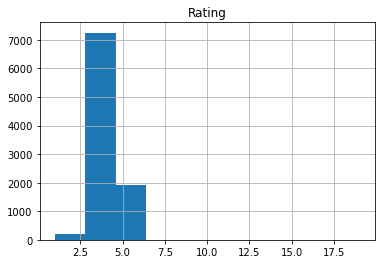

In [20]:
df.hist(column="Rating")

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


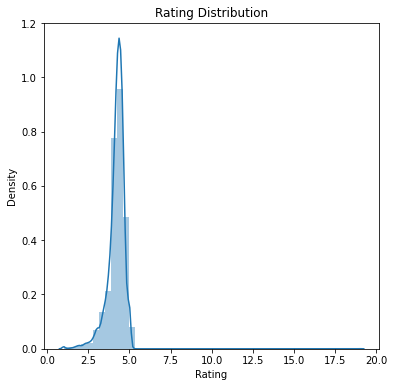

In [21]:
#Distribution of count
plt.figure(figsize=(6,6))
sns.distplot(df['Rating'])
plt.title('Rating Distribution')
plt.show()

In [22]:
df['Rating'].mean()

4.193338315362448

In [23]:
df['Rating'].median()

4.3

In [24]:
df['Rating'].mode()

0    4.4
Name: Rating, dtype: float64

In [25]:
# from the above observation mean median and mode are near to each other so let us replace all the NAN values with 
# 4.3 since the disctribution is not symmetrical for to be replaced by its mean

In [29]:
df['Rating'] = df['Rating'].fillna(4.3)

In [30]:
df['Rating'].isnull().sum()

0

So All NaN Values in Rating column is replaced by 4.3

In [31]:
# Check the ditribution of all columns Content Rating, Current Ver and Android Version

In [36]:
# Cannot check distribution of Type as it is categorical in nature. So Replace Type column Nan Value with the most occuring 
#value

In [37]:
df['Type'].mode()

0    Free
Name: Type, dtype: object

Replace the missing Null Value with Value Free

In [41]:
df['Type']=df['Type'].fillna('Free')

In [42]:
df['Type'].isnull().sum()

0

So we have replaced Type Column missing value with 'Free'

In [43]:
# Let us check most occuring value for Content Rating column

In [44]:
df['Content Rating'].mode()

0    Everyone
Name: Content Rating, dtype: object

In [45]:
df['Content Rating'] = df['Content Rating'].fillna('Everyone')

In [46]:
df['Type'].isnull().sum()

0

So we have replaced all the missing value with 'Everyone'

In [47]:
df['Current Ver'].mode()

0    Varies with device
Name: Current Ver, dtype: object

In [48]:
df['Current Ver'] = df['Current Ver'].fillna('Varies with device')
df['Current Ver'].isnull().sum()

0

In [49]:
df['Android Ver'].mode()

0    4.1 and up
Name: Android Ver, dtype: object

In [50]:
df['Android Ver'] = df['Android Ver'].fillna('4.1 and up')
df['Android Ver'].isnull().sum()

0

In [51]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Thus we have detected and replaced all missing values and the count of all missing values is zero now